264
(264, 264)


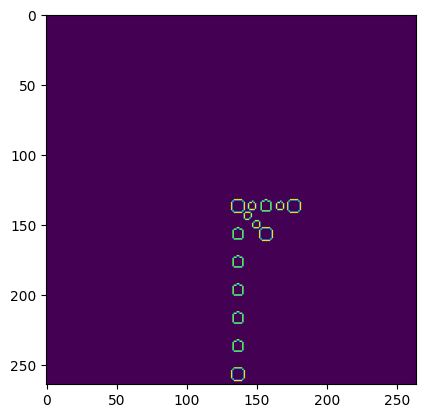

center_image1 [[136.5        136.5       ]
 [136.41666667 156.5       ]
 [136.5        176.5       ]
 [136.4375     146.5       ]
 [136.4375     166.5       ]
 [143.33333333 143.33333333]
 [149.66666667 149.66666667]
 [156.41666667 136.5       ]
 [156.5        156.5       ]
 [176.41666667 136.5       ]
 [196.41666667 136.5       ]
 [216.41666667 136.5       ]
 [236.41666667 136.5       ]
 [256.5        136.5       ]]
center_image2 [[136.5        136.5       ]
 [136.45833333 156.5       ]
 [136.5        176.5       ]
 [136.375      146.5       ]
 [136.375      166.5       ]
 [143.33333333 143.33333333]
 [146.375      136.5       ]
 [149.66666667 149.66666667]
 [156.46428571 156.5       ]
 [156.45833333 136.5       ]
 [166.375      136.5       ]
 [176.45833333 136.5       ]
 [186.375      136.5       ]
 [196.45833333 136.5       ]
 [206.375      136.5       ]
 [216.5        136.5       ]]


In [82]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

# Load the data
binary_image1 = np.load('CerclesI1.npy')
print(binary_image1.shape[0])
binary_image2 = np.load('CerclesI2.npy')
print(binary_image2.shape)
center_image1= np.load('CerclesC1.npy')
plt.imshow(binary_image1)
plt.show()
print("center_image1",center_image1)
center_image2= np.load('CerclesC2.npy')
print("center_image2",center_image2)

In [83]:
# Object points in 3D space
objp = np.array([
    [0, 0, 0],
    [0.7,0.7,0],
    [0, 1, 0],
    [1.31,1.31,0],   
    [0, 2, 0],
    [2,2,0],
    [0, 3, 0],
    [0, 4, 0],
    
    


], dtype=np.float32)
print(objp)
# Image points in 2D space for image 1
import numpy as np

# Assuming `center_image1` and `center_image2` are arrays or lists containing coordinates

# Image points in 2D space for image 1
imgpoints1 = np.array([
    [center_image1[0][0], center_image1[0][1]],
    [center_image1[5][0], center_image1[5][1]],
    [center_image1[3][0], center_image1[3][1]],
    [center_image1[6][0], center_image1[6][1]],
    [center_image1[1][0], center_image1[1][1]],
    [center_image1[8][0], center_image1[8][1]],
    [center_image1[4][0], center_image1[4][1]],
    [center_image1[2][0], center_image1[2][1]],
   
    

], dtype=np.float32)
imgpoints1 = np.reshape(imgpoints1, (-1,1,2))
# Image points in 2D space for image 2
imgpoints2 = np.array([
    [center_image2[0][0], center_image2[0][1]],
    [center_image2[5][0], center_image2[5][1]],
    [center_image2[3][0], center_image2[3][1]],
    [center_image2[7][0], center_image2[7][1]],
    [center_image2[1][0], center_image2[1][1]],
    [center_image2[8][0], center_image2[8][1]],
    
    [center_image2[4][0], center_image2[4][1]],
    [center_image2[2][0], center_image2[2][1]],
    

], dtype=np.float32)
imgpoints2 = np.reshape(imgpoints2, (-1,1,2))
print(imgpoints2)

[[0.   0.   0.  ]
 [0.7  0.7  0.  ]
 [0.   1.   0.  ]
 [1.31 1.31 0.  ]
 [0.   2.   0.  ]
 [2.   2.   0.  ]
 [0.   3.   0.  ]
 [0.   4.   0.  ]]
[[[136.5     136.5    ]]

 [[143.33333 143.33333]]

 [[136.375   146.5    ]]

 [[149.66667 149.66667]]

 [[136.45833 156.5    ]]

 [[156.46428 156.5    ]]

 [[136.375   166.5    ]]

 [[136.5     176.5    ]]]


In [ ]:
img = cv.imread("CerclesC1.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [100]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
image_size = (binary_image1.shape[0], binary_image1.shape[1])
# Here, you need to specify your initial guess for the intrinsic matrix
initial_intrinsic_matrix = np.array([[7.5, 0, len(gray)/2],
                                     [0, 7.5, len(gray)/2],
                                     [0, 0, 1]])
for imgp in [imgpoints1,imgpoints2]:
    objpoints.append(objp)
    imgpoints.append(imgp)

    ret,mtx,dist,rvecs,tvecs = cv.calibrateCamera(objpoints,imgpoints, gray.shape[::-1], initial_intrinsic_matrix,None,None, flags=cv.CALIB_USE_INTRINSIC_GUESS)

In [101]:
print(rvecs)
print("rvecs1",rvecs[0])
print("rvecs2",rvecs[1])
##matrice de rotation => convertir le vecteur en matrice
print("(rvecs[0])[0] ",(rvecs[0])[0] )
rmatRight = cv.Rodrigues(rvecs[0])[0] 
print("rmatRight",rmatRight)
rmatLeft = cv.Rodrigues(rvecs[1])[0]  

print("tvecs[0]",tvecs[0])
print("tvecs[1]",tvecs[1])
#matrice complète [R|t] => ajouter t dans R
rotMatRight = np.concatenate((rmatRight,tvecs[0]), axis=1)
rotMatLeft = np.concatenate((rmatLeft,tvecs[1]), axis=1)

(array([[ 3.37097751e-05],
       [-1.23806283e-04],
       [-9.52385366e-04]]), array([[ 3.85115359e-05],
       [-1.00756419e-04],
       [-6.32689970e-04]]))
rvecs1 [[ 3.37097751e-05]
 [-1.23806283e-04]
 [-9.52385366e-04]]
rvecs2 [[ 3.85115359e-05]
 [-1.00756419e-04]
 [-6.32689970e-04]]
(rvecs[0])[0]  [3.37097751e-05]
rmatRight [[ 9.99999539e-01  9.52383133e-04 -1.23822316e-04]
 [-9.52387307e-04  9.99999546e-01 -3.36508143e-05]
 [ 1.23790211e-04  3.37687255e-05  9.99999992e-01]]
tvecs[0] [[-10.3431257 ]
 [-10.34005491]
 [  0.7489862 ]]
tvecs[1] [[-10.3444483 ]
 [-10.34053421]
 [  0.74901851]]


In [126]:
#matrice de la camera @ RT
camLeft = mtx @ rotMatLeft
camRight = mtx @ rotMatRight

# trouver cx et cy (coo centre optique dans limage) pour les 2 cameras
camWorldCenterLeft = np.linalg.inv(np.concatenate((rotMatLeft,[[0,0,0,1]]), axis=0)) @ np.transpose([[0,0,0,1]])
print(camWorldCenterLeft)
camWorldCenterRight = np.linalg.inv(np.concatenate((rotMatRight,[[0,0,0,1]]), axis=0)) @ np.transpose([[0,0,0,1]])
print('Centre Gauche\n',camWorldCenterLeft) #1colonne à 4lignes
print('Centre Gauche\n', camWorldCenterRight) #1colonne à 4lignes
def crossMat(v):
    v = v[:, 0]   # Matrice ligne afin d'accéder plus facilement aux valeurs v[1]...
    return np.array([[0, -v[2], v[1]],
                     [v[2], 0, -v[0]],
                     [-v[1], v[0], 0]])

def matFondamental(camLeft,centerRight,camRight):
        
        return np.array((crossMat(camLeft @ centerRight)) @ camLeft @ np.linalg.pinv(camRight))
    


[[10.33782835]
 [10.34704807]
 [-0.7504588 ]
 [ 1.        ]]
Centre Gauche
 [[10.33782835]
 [10.34704807]
 [-0.7504588 ]
 [ 1.        ]]
Centre Gauche
 [[10.33318048]
 [10.34987554]
 [-0.75061486]
 [ 1.        ]]


In [103]:
def mark_circle_centers(binary_image, center_image):
    # Create a new image with the same dimensions as binary_image
    center_marked_image = np.zeros_like(binary_image)
    
    # Iterate through each center and mark it as 1
    for center in center_image:
        # Retrieve center coordinates
        center_x, center_y = int(center[1]), int(center[0])  # Convert to integers
        
        # Ensure the center coordinates are within the bounds of the image
        if 0 <= center_x < binary_image.shape[1] and 0 <= center_y < binary_image.shape[0]:
            # Mark the center as 1 in the new image
            center_marked_image[center_y, center_x] = 1
    
    return center_marked_image

Shape of center_marked_image1: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of center_marked_image2: (264, 264)


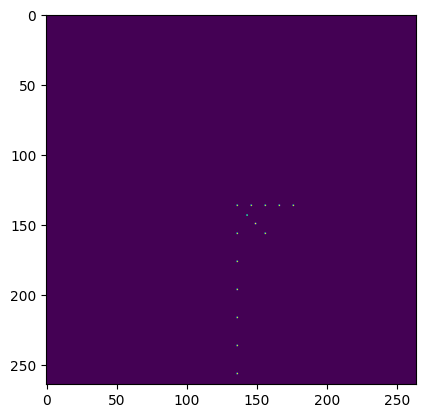

In [104]:
# Mark circle centers in both binary images
center_marked_image1 = mark_circle_centers(binary_image1, center_image1)
center_marked_image2 = mark_circle_centers(binary_image2, center_image2)

# Display the shape of the new images
print("Shape of center_marked_image1:", center_marked_image1)
print("Shape of center_marked_image2:", center_marked_image2.shape)

plt.imshow(center_marked_image1)
plt.show()

In [105]:
def getEpiLines(F, points):
    return F @ points


def findEpilines(path,center_image):
    epilines = [] # liste de chaque point gauche associe à sa ligne epipolaire
    for l in range(1):  #parcourt dossier images (26)
        
            strp = path 
    
    strp = path
    
        
        
    red = mark_circle_centers(strp, center_image)
    print("red",red)
    tempEpilines = []  #epiline associées a leurs points gauches temporairement 
    pointsLeft = [[],[],[]]
#Trouver Les points left'''        
    #i = lindice de chaque ligne epipolaire
    for i, line in enumerate(red):  #line = une liste de pixels rouges
        for pixel in line:
            if pixel != 0:
                pixel = 1
        try:
            #weighted average => (0*0 + 1*0 + 2*0 + ... + 1248 * 1 + 1249 * 0) / n° of red pixels
            #for instance => (1261+1262+1267)/3 = 1263.33
            #give position of the red line in x axis
            pointsLeft[0].append(np.average(range(264), weights = line)) #calcul des points de chaque ligne epipolair
                                    # moyenne pondere : on parcourt limage horizantalement de position 0 a position 1920
                                    #ces positions sont multipliés par la valeur du pixel(0 ou 1 cad rouge ou non)
            pointsLeft[1].append(i) # y axis
            pointsLeft[2].append(1)  
        except:
            pass
        #A partir de la ligne rouge de l'image de gauche, trouver l'épiline correspondante sur l'image de droite.
        #Trouver les épilines sur l'image de droite de tous les points rouges de l'image de gauche.

            #Calculer les epilines grace a la fonction getEpilines''' 
        
    print("pointsLeft",pointsLeft)    
    epilinesRight = getEpiLines(Fondamental, pointsLeft)
    
    tempEpilines.append(pointsLeft)
    tempEpilines.append(epilinesRight)
    epilines.append(tempEpilines)  # # liste de chaque point gauche associe à sa aligne epipolaire
    print("epilines",epilines)
    return epilines  

In [106]:
Fondamental = matFondamental(camRight,camWorldCenterLeft,camLeft)


epl = findEpilines(binary_image2, center_image2)  #liste de chaque point gauche associe à sa lignes epipolaires de la camera droite stocke sous forme de matrice a 2 colonnes
#scan gauche vers droite
epl= np.array(epl)
coef , length = epl[0][1].shape
print("coef , length ",coef , length )
print(epl.shape)
print(epl[0][1])

def lineY(coefs,x):
    a,b,c = coefs
    return-(c+a*x)/b

red [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
pointsLeft [[156.0, 143.0, 136.0, 149.0, 146.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0], [136, 143, 146, 149, 156, 166, 176, 186, 196, 206, 216], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
epilines [[[[156.0, 143.0, 136.0, 149.0, 146.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0], [136, 143, 146, 149, 156, 166, 176, 186, 196, 206, 216], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], array([[-4.95973159e-03, -6.05518447e-03, -6.52464255e-03,
        -6.99440487e-03, -8.09000987e-03, -9.65507296e-03,
        -1.12202882e-02, -1.27855034e-02, -1.43507186e-02,
        -1.59159338e-02, -1.74811490e-02],
       [-4.79861504e-02, -5.00192090e-02, -5.11139884e-02,
        -4.90802069e-02, -4.95489850e-02, -5.11125426e-02,
        -5.11118197e-02, -5.11110968e-02, -5.11103739e-02,
        -5.11096510e-02, -5.11089281e-02],
       [ 7.29992309e+00,  8.01871

[[-4.95973159e-03 -6.05518447e-03 -6.52464255e-03 -6.99440487e-03
  -8.09000987e-03 -9.65507296e-03 -1.12202882e-02 -1.27855034e-02
  -1.43507186e-02 -1.59159338e-02 -1.74811490e-02]
 [-4.79861504e-02 -5.00192090e-02 -5.11139884e-02 -4.90802069e-02
  -4.95489850e-02 -5.11125426e-02 -5.11118197e-02 -5.11110968e-02
  -5.11103739e-02 -5.11096510e-02 -5.11089281e-02]
 [ 7.29992309e+00  8.01871856e+00  8.35007516e+00  8.35521222e+00
   8.91089792e+00  9.79794021e+00  1.05218727e+01  1.12458053e+01
   1.19697378e+01  1.26936703e+01  1.34176029e+01]]
3
11
3
11


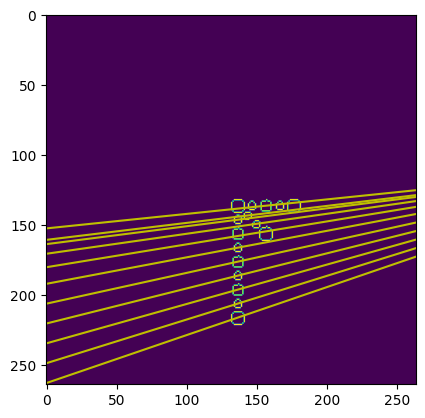

In [122]:
def drawEpl(fname,EplRight):
    print(EplRight)
    #img = cv.imread(fname)
    img=fname
    
    coef , length = EplRight.shape #shape=number of elements in each dimension.
                                    #coef= nbre de lignes , length = nbre colonnes
    print(coef)
    print(length)
    print(coef)
    print(length)
    
    for i in range(0,length): #40 = le pas, pn dessine les epilines avec un intervalle de 40 verticalement donc jsq 1080
        plt.plot([0,264],[lineY(EplRight[:,i],0),lineY(EplRight[:,i],264)],'y')
        
        
    plt.imshow(img)
    plt.show()
drawEpl(binary_image2,epl[0][1])

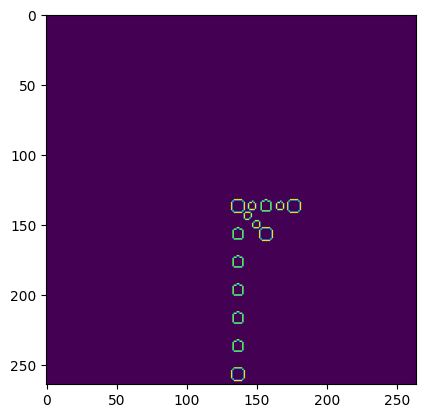

In [70]:
img = cv.imread("CerclesI1.png")
plt.imshow(binary_image1)
plt.show()

In [125]:
def triangulate_points(points_left, epilines, cam_matrix_left, cam_matrix_right):
    points_3d = []
    
    for i in range(len(points_left[0])):
        # Obtenez les coordonnées du point sur l'image gauche
        x_left = points_left[0][i]
        y_left = points_left[1][i]
        # Construisez le vecteur du point sur l'image gauche
        point_left = np.array([x_left, y_left, 1])
        
        # Obtenez la ligne épipolaire correspondante
        # Obtenez la ligne épipolaire correspondante
        epiline = epilines[1][i]

        
        # Calculer la coordonnée x du point correspondant sur l'image droite
        x_right = (-epiline[2] - epiline[1] * y_left) / epiline[0]
        
        # Construisez le vecteur du point sur l'image droite
        point_right = np.array([x_right, y_left, 1])
        
        # Triangulation
        # Utilisez la fonction de triangulation OpenCV pour trouver la position 3D du point
        point_3d_homogeneous = cv.triangulatePoints(cam_matrix_left, cam_matrix_right, point_left, point_right)
        point_3d = point_3d_homogeneous[:3] / point_3d_homogeneous[3]  # Convertir en coordonnées 3D
        
        points_3d.append(point_3d)
    
    return np.array(points_3d)

# Supposons que vous avez déjà les matrices de caméra gauche et droite
cam_matrix_left = camWorldCenterLeft
cam_matrix_right = camWorldCenterRight # Supposons que les matrices de caméra sont les mêmes pour la simplicité
print(cam_matrix_left)

# Supposons que vous avez les points sur l'image gauche et les lignes épipolaires correspondantes
points_left = np.array([[156.0, 143.0, 136.0, 149.0, 146.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0],
                        [136, 143, 146, 149, 156, 166, 176, 186, 196, 206, 216],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
epilines = [[[156.0, 143.0, 136.0, 149.0, 146.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0],
             [136, 143, 146, 149, 156, 166, 176, 186, 196, 206, 216],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
            [[-4.95973159e-03, -6.05518447e-03, -6.52464255e-03,
              -6.99440487e-03, -8.09000987e-03, -9.65507296e-03,
              -1.12202882e-02, -1.27855034e-02, -1.43507186e-02,
              -1.59159338e-02, -1.74811490e-02],
             [-4.79861504e-02, -5.00192090e-02, -5.11139884e-02,
              -4.90802069e-02, -4.95489850e-02, -5.11125426e-02,
              -5.11118197e-02, -5.11110968e-02, -5.11103739e-02,
              -5.11096510e-02, -5.11089281e-02],
             [7.29992309e+00, 8.01871856e+00, 8.35007516e+00,
              8.35521222e+00, 8.91089792e+00, 9.79794021e+00,
              1.05218727e+01, 1.12458053e+01, 1.19697378e+01,
              1.26936703e+01, 1.34176029e+01]]]

# Appelez la fonction pour trianguler les points
points_3d = triangulate_points(points_left, epilines, cam_matrix_left, cam_matrix_right)


[[10.33782835]
 [10.34704807]
 [-0.7504588 ]
 [ 1.        ]]


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\triangulate.cpp:75: error: (-209:Sizes of input arguments do not match) Number of proj points coordinates must be == 2 in function 'icvTriangulatePoints'
